In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
## Data Collection and Processing
df = pd.read_csv("C:/Users/91933/Desktop/tested.csv")
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
df.shape

(418, 12)

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Dropping the cabin column from the dataset 
titanic_data=df.drop(columns='Cabin',axis=1)

In [10]:
#Replacing the missing values in column age with mean 
titanic_data['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
#calculating the mode value for the column fare
print(df['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [12]:
#calculating the mode value for the column fare for mode 0
print(df['Fare'].mode()[0])

7.75


In [13]:
#Now replacing the missing value in fare column from the mode value
titanic_data['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [14]:
#Now replacing the missing value in fare column from the mode value
titanic_data['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [15]:
#now again checking for null values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# collecting statistics about the data-set
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
#Finding the no of survivals and deaths 
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

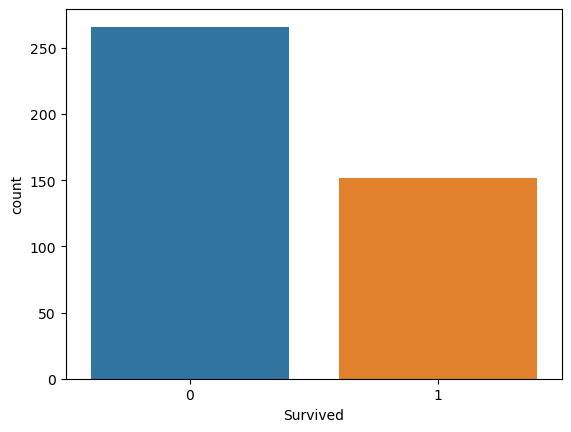

In [18]:
sns.countplot(x="Survived",data=titanic_data)

In [19]:
titanic_data["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

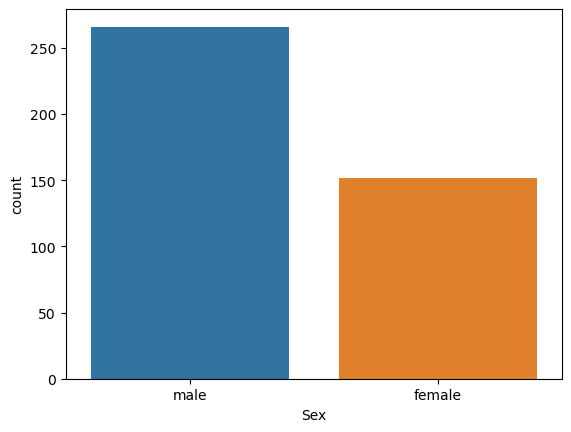

In [20]:
#making a bar chart for sex column 
sns.countplot(x="Sex",data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

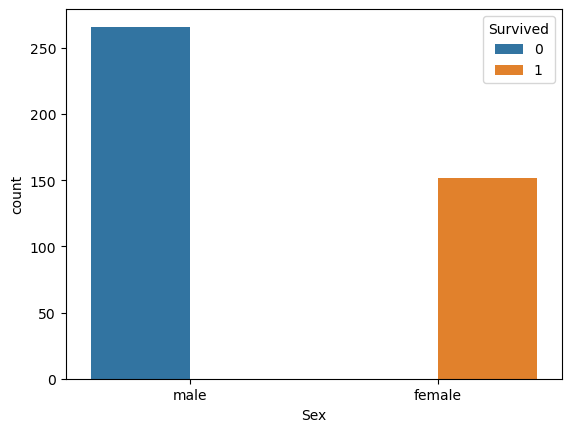

In [21]:
# total no of survivors both male&female
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [22]:
#counting the no of survivors
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

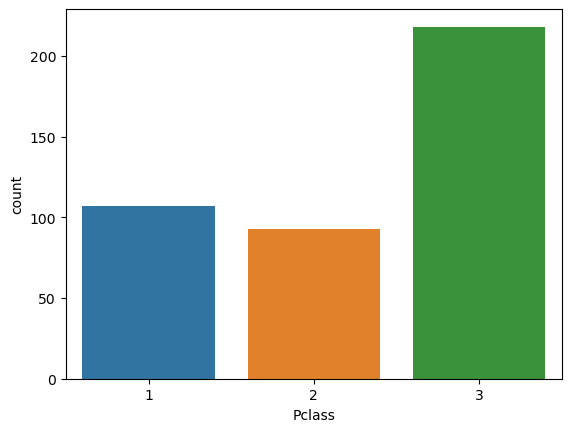

In [23]:
#no of survivor's in P-class
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

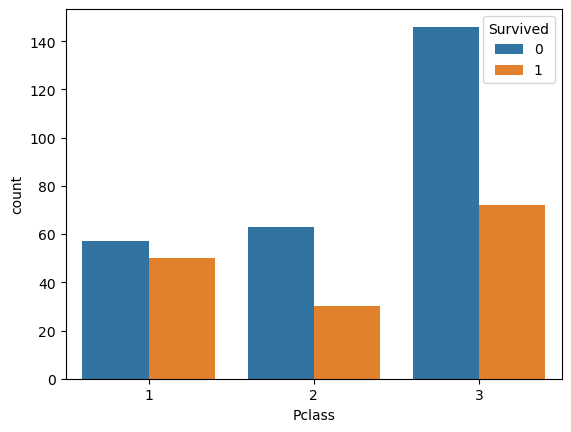

In [24]:
#no of male & female survivors in P-class
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

<Axes: >

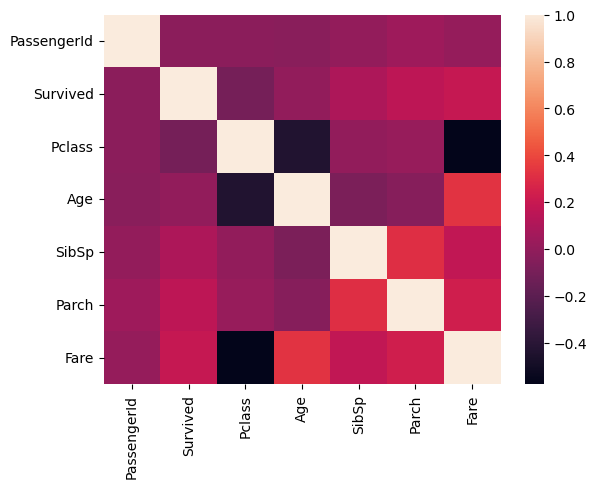

In [25]:
#showing the data with a heat-map
corr=titanic_data.corr()
sns.heatmap(corr)

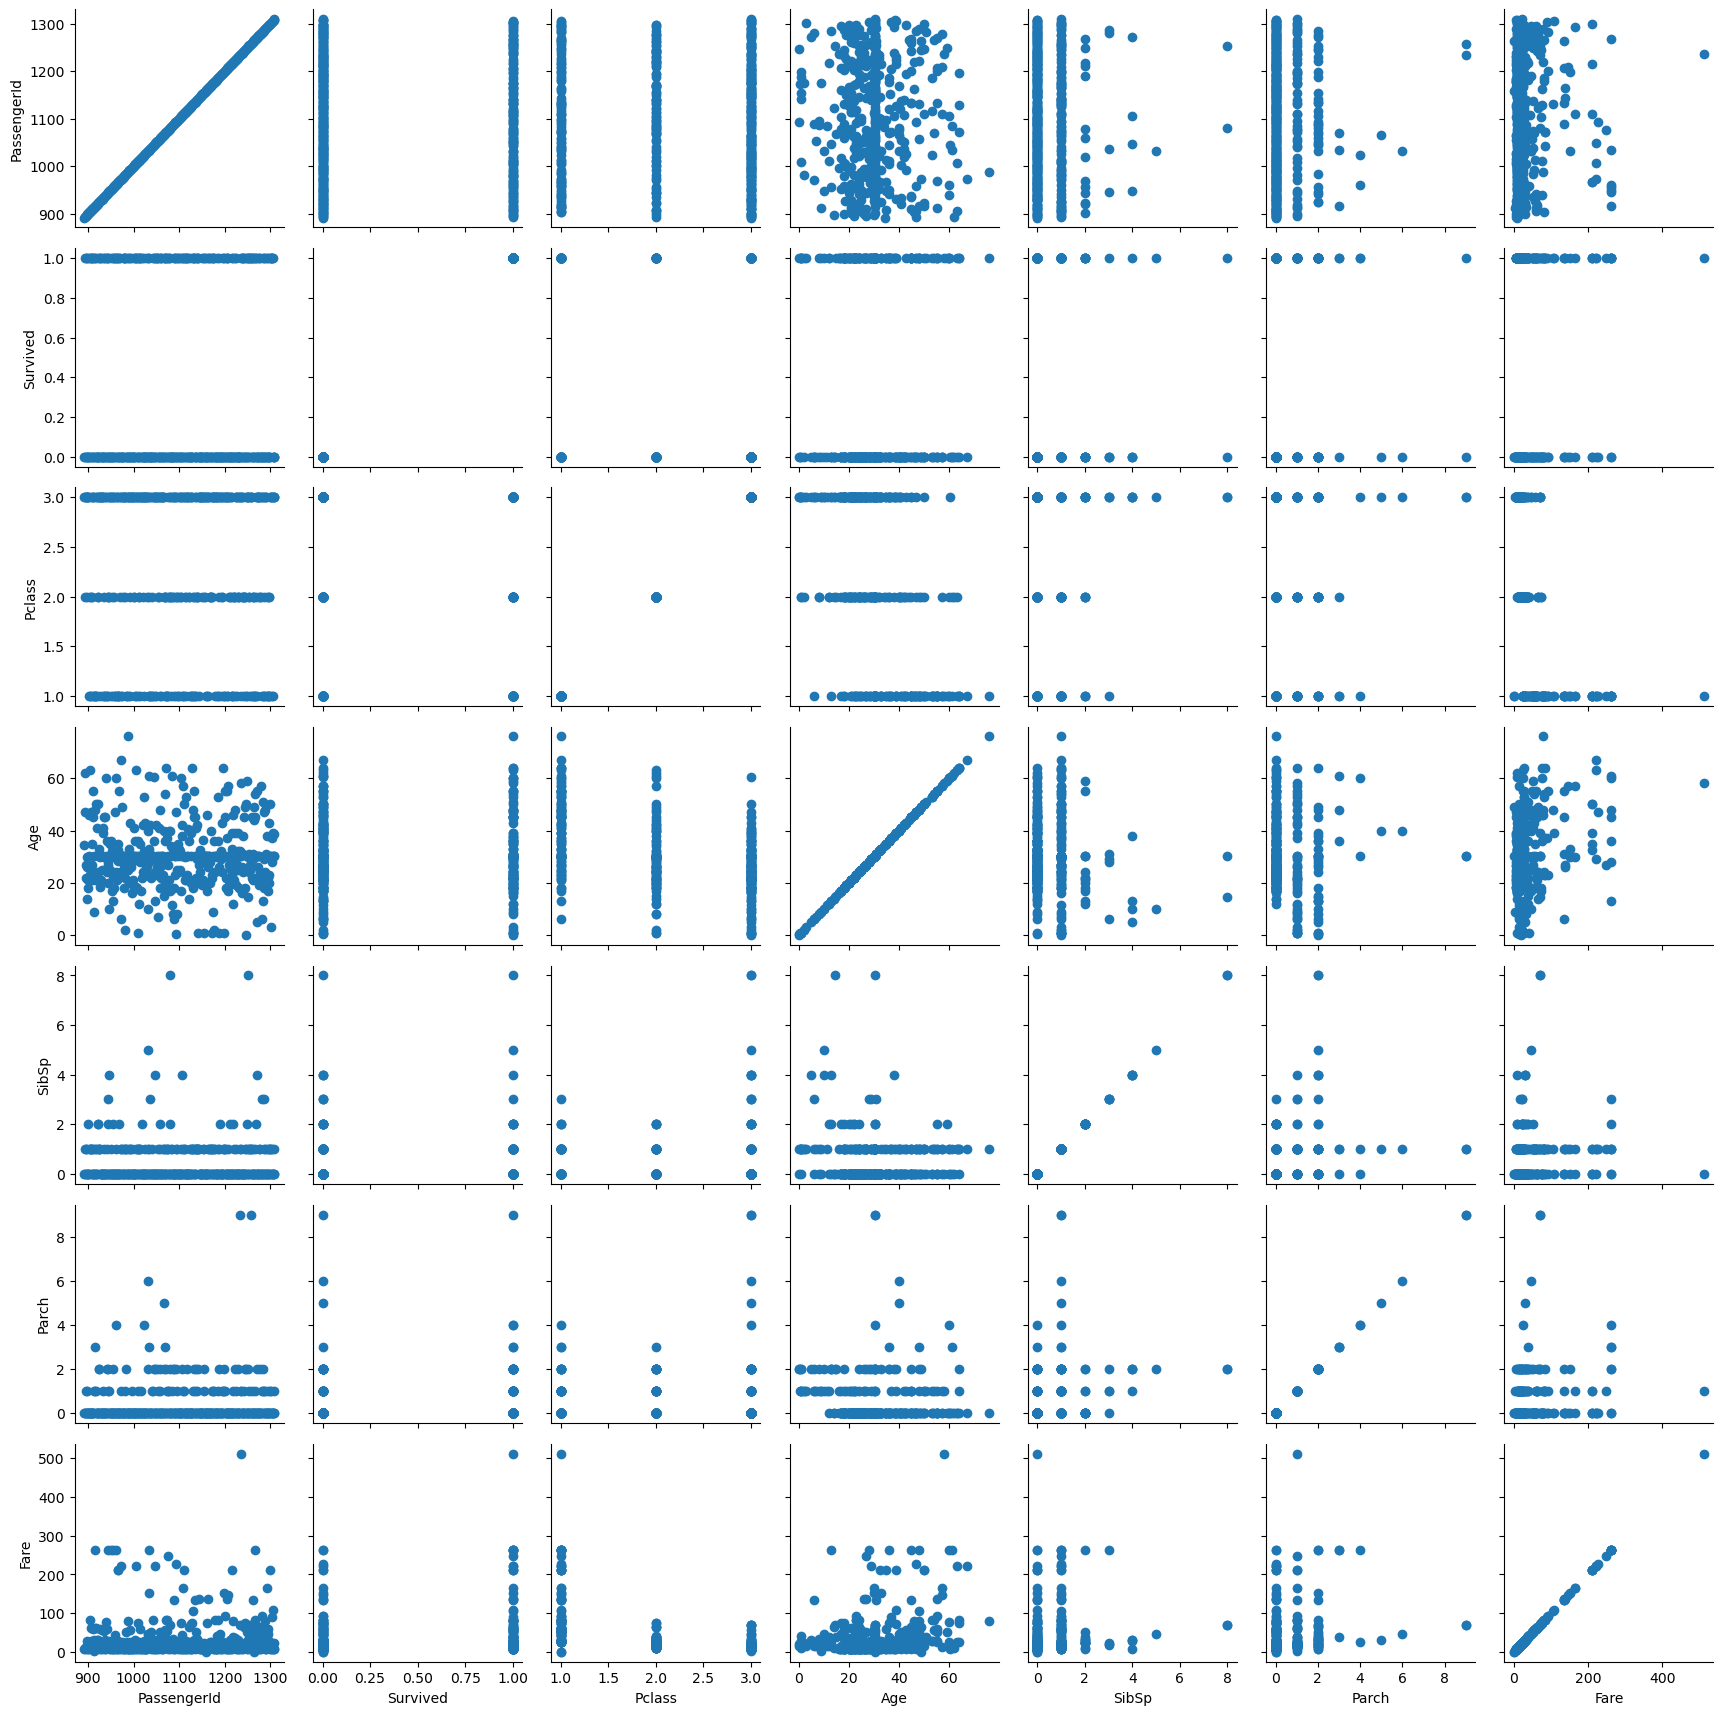

In [26]:
g=sns.PairGrid(titanic_data)
g.map(plt.scatter)
plt.show()

In [27]:
#converting categorical columns here female is assigned=0 and male is encoded to 1
titanic_data['Sex'].replace('female',0,inplace=True)
titanic_data['Sex'].replace('male',1,inplace=True)
titanic_data['Embarked'].replace('S',0,inplace=True)
titanic_data['Embarked'].replace('C',1,inplace=True)
titanic_data['Embarked'].replace('Q',2,inplace=True)


In [28]:
#now showing the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


In [29]:
x=titanic_data.drop(columns=['Survived','PassengerId','Name','Ticket'],axis=1)
y=titanic_data['Survived']


In [30]:
#showing the values stored in column x
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,2
1,3,0,47.00000,1,0,7.0000,0
2,2,1,62.00000,0,0,9.6875,2
3,3,1,27.00000,0,0,8.6625,0
4,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


In [31]:
#showing the values stored in column y
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)


(418, 7) (334, 7) (84, 7)


In [34]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# model evaulation


In [36]:
x_train_prediction=model.predict(x_train)

In [37]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [39]:
Training_Data_Accuracy=accuracy_score(y_train,x_train_prediction)
print("Accuracy score of Training Data :",Training_Data_Accuracy)

Accuracy score of Training Data : 1.0


In [40]:
#accuracy on test data 
x_test_prediction=model.predict(x_test)

In [41]:
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [43]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('acuuracy score of test data :',test_data_accuracy)

acuuracy score of test data : 1.0
